In [70]:
#imports
import math
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#GaussianElimination
def GaussianElimination(A,B):
    n = A.shape[0]

    for i in range(n):
        if(A[i][i] == 0):
            print("Error Occured, Diagonal Element is Zero")
        #for all next row
        for j in range(i+1,n):
            r = A[j][i] / A[i][i]
            #j tomo row er sobgula element update kora
            for k in range(n):
                A[j][k] = A[j][k] - r * A[i][k]
            B[j] = B[j] - r*B[i]
    #end of Forward Elemination
    for i in range(n-1,-1,-1):
        B[i] = B[i] / A[i][i]
        #uporer sobgula row er B update
        for j in range(j):
            B[j] = B[j] - A[j][i] * B[i]
    return B

In [72]:
#read data
X = []
Y = []
for line in open('data.txt').readlines():
    line = line.split(' ')
    X.append(float(line[0]))
    Y.append(float(line[1]))
noOfPoints = len(X)


In [73]:
A1 = 0
A2 = 0
B1 = 0
B2 = 0
C1 = 0
C2 = 0 

for i in range(noOfPoints):
    A1 += X[i]**2
    A2 += X[i] * math.exp(X[i])
    B2 += math.exp(2*X[i])
    C1 += X[i] * Y[i]
    C2 += math.exp(X[i]) *  Y[i]
B1 = A2


A = np.zeros((2,2))
B = np.zeros(2)
A[0][0] = A1
A[0][1] = B1
A[1][0] = A2
A[1][1] = B2

B[0] = C1
B[1] = C2

ans = GaussianElimination(A, B)
print(ans)


[ 2.37704251 -0.60195579]


In [74]:
def f(x):
    return 2.37704251*x -0.60195579* math.exp(x)



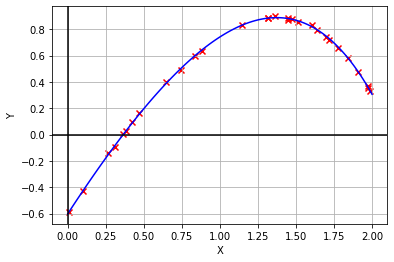

In [85]:
#plotting data on matplotlib
fig, ax = plt.subplots()
ax.set_xlabel("X")
ax.set_ylabel("Y")


Xarr = np.linspace(0,2,100)
lst = list()
for i in Xarr:
    y = f(i)
    lst.append(y)
Yarr = np.array(lst)

ax.plot(Xarr,Yarr, 'blue',label= 'f(x)')

for i in range(noOfPoints):
    ax.scatter(X[i],Y[i],color = 'r',marker = 'x')

ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()